# Latihan 6


In [8]:
# Mengimpor library yang dibutuhkan
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
im = Image.open("Lenna.jpg").resize((255,255))
arr = np.array(im.copy())

In [10]:
keys = np.arange(256)
histOri = np.zeros((256),dtype=np.uint32)

In [11]:
for y in range(arr.shape[0]):
    for x in range(arr.shape[1]):
        akum = (int(arr[x,y,0])+int(arr[x,y,1])+int(arr[y,x,2]))
        tmp = max(min(int(akum/3),255),0)
        arr[y,x] = [tmp,tmp,tmp]
        histOri[tmp] = histOri[tmp]+1;

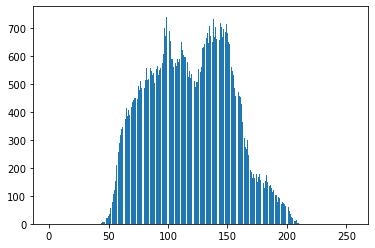

In [12]:
fig = plt.figure(1)
plt.bar(keys,histOri)
fig.canvas.draw()
dataOri = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataOri = dataOri.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImageOri = Image.fromarray(dataOri).resize((255,255))
histNpOri = np.array(histImageOri)

In [13]:
Image.fromarray(np.vstack((histNpOri,arr))).show()